In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zara-products/searches_zara.json
/kaggle/input/zara-products/store_zara.csv
/kaggle/input/zara-products/images/images/zara/c1445139-c96b-48d7-af43-f6ce7e072eb6.jpg
/kaggle/input/zara-products/images/images/zara/873f0d77-8971-4b6c-a636-a17b5e9ced49.jpg
/kaggle/input/zara-products/images/images/zara/8d52e5cc-5436-4bae-bb36-c0a56ece631b.jpg
/kaggle/input/zara-products/images/images/zara/1bd628a5-9e99-49cf-8865-8e417c633bf3.jpg
/kaggle/input/zara-products/images/images/zara/e72a1837-2bd7-4807-8ef4-592aa059d201.jpg
/kaggle/input/zara-products/images/images/zara/bfbd0d89-fb63-4471-a468-13aa77a58186.jpg
/kaggle/input/zara-products/images/images/zara/d336ced9-5472-41c4-b96c-34602259e3ff.jpg
/kaggle/input/zara-products/images/images/zara/c368ae94-8dc2-421d-b83c-ea8b09fe7c21.jpg
/kaggle/input/zara-products/images/images/zara/448c0be5-84e1-454d-8db8-282a56c0d2f5.jpg
/kaggle/input/zara-products/images/images/zara/699892ab-8ee0-4a59-b088-0bda2f778598.jpg
/kaggle/input/zara-products/im

### Import libraries

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Loading the data

In [4]:
# Load the dataset using pandas library
store_zara = pd.read_csv("/kaggle/input/zara-products/store_zara.csv")

In [5]:
# Describe the loaded dataset
store_zara.describe

<bound method NDFrame.describe of      brand                                                url  \
0     Zara  https://www.zara.com/us/en/basic-puffer-jacket...   
1     Zara  https://www.zara.com/us/en/tuxedo-jacket-p0889...   
2     Zara  https://www.zara.com/us/en/slim-fit-suit-jacke...   
3     Zara  https://www.zara.com/us/en/stretch-suit-jacket...   
4     Zara  https://www.zara.com/us/en/double-faced-jacket...   
...    ...                                                ...   
3124  Zara  https://www.zara.com/us/en/tuberose-100-ml-p20...   
3125  Zara  https://www.zara.com/us/en/wool-alpaca-fringed...   
3126  Zara  https://www.zara.com/us/en/alpaca-and-wool-ble...   
3127  Zara         https://www.zara.com/us/en/-p20120456.html   
3128  Zara  https://www.zara.com/us/en/crossbody-bag-p1604...   

                   sku                                name  \
0      272145190-250-2                 BASIC PUFFER JACKET   
1     324052738-800-46                       TUXEDO JACKET   

In [6]:
# Display first rows of the dataset
print(store_zara.head())

  brand                                                url               sku  \
0  Zara  https://www.zara.com/us/en/basic-puffer-jacket...   272145190-250-2   
1  Zara  https://www.zara.com/us/en/tuxedo-jacket-p0889...  324052738-800-46   
2  Zara  https://www.zara.com/us/en/slim-fit-suit-jacke...  335342680-800-44   
3  Zara  https://www.zara.com/us/en/stretch-suit-jacket...  328303236-420-44   
4  Zara  https://www.zara.com/us/en/double-faced-jacket...   312368260-800-2   

                   name                                        description  \
0   BASIC PUFFER JACKET  Puffer jacket made of tear-resistant ripstop f...   
1         TUXEDO JACKET  Straight fit blazer. Pointed lapel collar and ...   
2  SLIM FIT SUIT JACKET  Slim fit jacket. Notched lapel collar. Long sl...   
3   STRETCH SUIT JACKET  Slim fit jacket made of viscose blend fabric. ...   
4   DOUBLE FACED JACKET  Jacket made of faux leather faux shearling wit...   

    price currency                                

In [7]:
# Check for the missing values in the dataset
print(store_zara.isnull().sum())

brand                 0
url                   0
sku                   0
name                 64
description          70
price                 0
currency              0
images                0
scraped_at            0
terms                 0
section               0
error              3129
image_downloads       0
dtype: int64


In [8]:
# Shape of the dataset
print(store_zara.shape)

(3129, 13)


## **Data Cleaning** 

### Handling missing values

In [9]:
# For handling missing values in numerical columns, fill them with mean, median, or 0 
# As we have missing values for Error columns of products, we assume this dataset does not
# have any error for the entries, and fill this column with 0
store_zara['error'] = store_zara['error'].fillna(0)

In [10]:
# Fill the missing values of Name and Description columns with placeholder text such as: 
# Unknown or No description is available 
# Fill missing values in 'Name of Product' and 'Description' columns with placeholder text
store_zara['name'] = store_zara['name'].fillna('Unknown')
store_zara['description'] = store_zara['description'].fillna('No description available')

### Removing duplicate rows

In [11]:
# Drop duplicates
store_zara.drop_duplicates(inplace=True)

## Descriptive Statistics

In [12]:
# Summary statistics
print(store_zara[['price']].describe())

             price
count  3129.000000
mean     64.100780
std      49.492635
min       1.990000
25%      39.900000
50%      49.900000
75%      69.900000
max     869.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


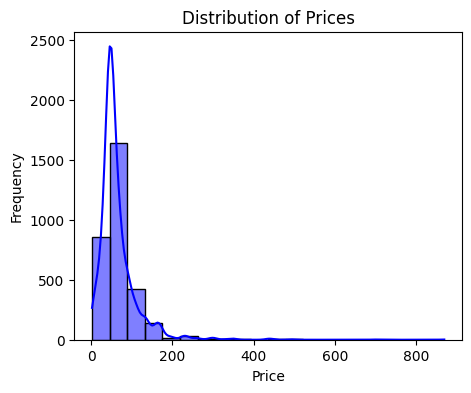

In [13]:
# Histogram of 'price'
plt.figure(figsize=(5, 4))
sns.histplot(store_zara['price'], bins=20, kde=True, color='blue')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


* ## Insight:

### The above histplot illustrates that over 1500 products are priced within the range of 0-200 USD.

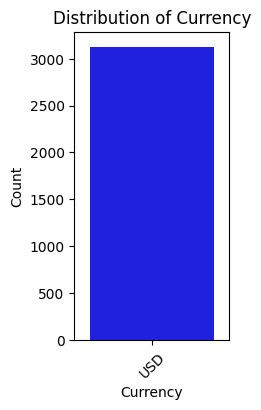

In [14]:
# Count plot of 'currency'
plt.figure(figsize=(2, 4))
sns.countplot(data=store_zara, x='currency', color = 'blue')
plt.title('Distribution of Currency')
plt.xlabel('Currency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

* ## Insight:
### The above plot depicts the number of currencies used in the dataset, revealing that only one currency, USD, is utilized.

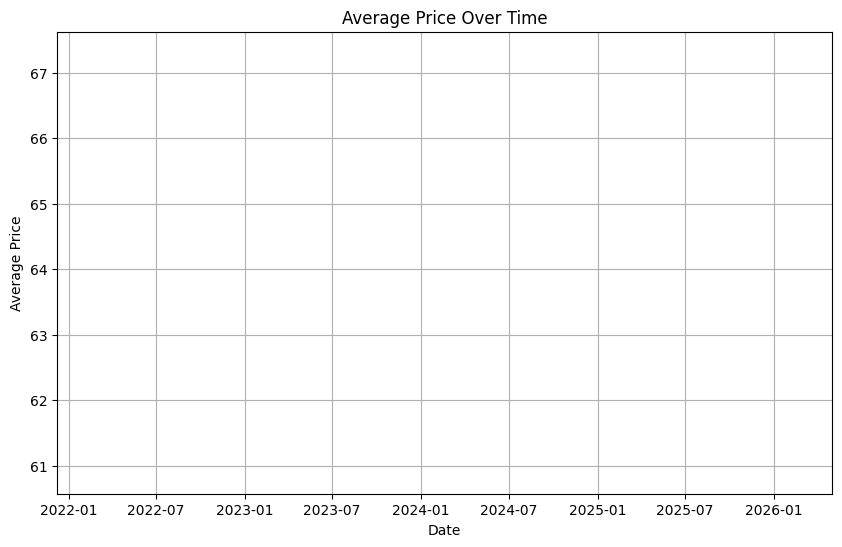

In [16]:
# Convert 'scraped_at' to datetime
store_zara['scraped_at'] = pd.to_datetime(store_zara['scraped_at'])

# Plot time series only if there are no missing values
if store_zara['scraped_at'].notnull().all() and store_zara['price'].notnull().all():
    # Time series plot
    plt.figure(figsize=(10, 6))
    store_zara.groupby(store_zara['scraped_at'].dt.date)['price'].mean().plot()
    plt.title('Average Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Price')
    plt.grid(True)
    plt.show()
else:
    print("Missing values detected. Cannot plot time series.")

* ## Insight:
### The above graph represents the average pricing over time. However, since the entire dataset is derived from a single date with no variation in dates, no plots are visible for this data.

In [17]:
print("Min date:", store_zara['scraped_at'].min())
print("Max date:", store_zara['scraped_at'].max())

Min date: 2024-02-19 08:50:05.654618
Max date: 2024-02-19 09:26:08.305584


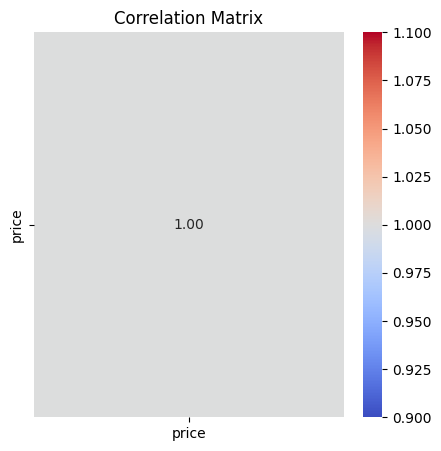

In [18]:
# Correlation matrix
corr_matrix = store_zara[['price']].corr()

# Heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

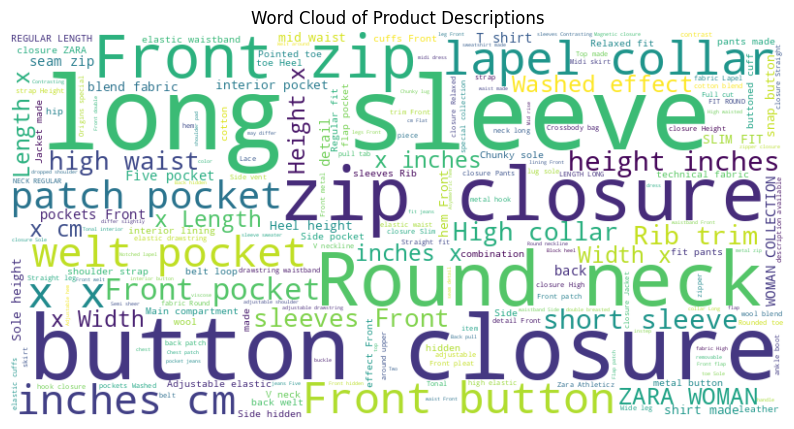

In [19]:
# Combine descriptions into a single string
descriptions_combined = ' '.join(store_zara['description'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(descriptions_combined)

# Display word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Product Descriptions')
plt.axis('off')
plt.show()

* ## Insight:
* #### Larger Words Shows Frequency:
##### - The size of words in the word cloud indicates the frequency of items sold by the store.
##### - Larger words represent products that are sold more frequently, highlighting popular items.
* #### Representation of Key Themes:
##### - Larger words may represent key themes reflecting customer interests.
##### - These themes offer insights into the topics or categories that are of particular importance to customers.
* #### Contrast with Smaller Words:
##### - Smaller-sized words in the word cloud suggest products that are sold less frequently.
##### - These smaller words represent items that have lower sales volume compared to others in the dataset.
* #### Sales Distribution:
##### - The contrast between large and small words provides insights into the distribution of sales across different products, and helps identify popular products based on their relative frequency of sale.


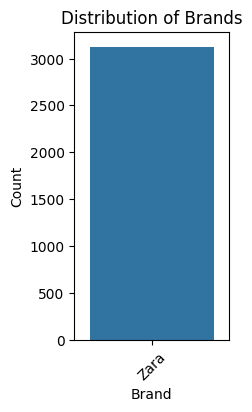

In [20]:
# Count plot of brand names
plt.figure(figsize=(2, 4))
sns.countplot(data=store_zara, x='brand')
plt.title('Distribution of Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

* ## Insight:
### This countplot displays the distribution of products across different brands. It illustrates that all products in this dataset exclusively belong to the brand Zara.

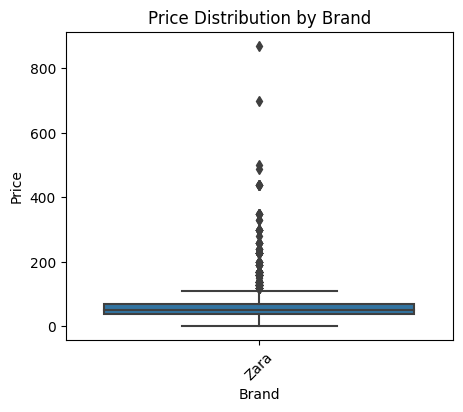

In [21]:
# Price distribution by brand
plt.figure(figsize=(5, 4))
sns.boxplot(data=store_zara, x='brand', y='price')
plt.title('Price Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


* ## Insight:
### The clustering of data points around this price range may suggest that prices around 0 to 450 USD are particularly popular among consumers purchasing Zara products.

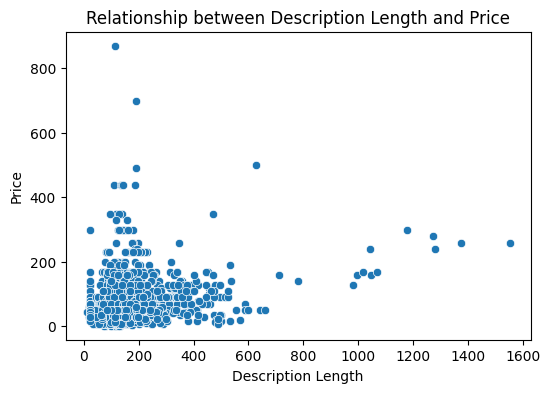

In [22]:
# Compute description length
store_zara['description_length'] = store_zara['description'].str.len()

# Scatter plot of description length vs. price
plt.figure(figsize=(6, 4))
sns.scatterplot(data=store_zara, x='description_length', y='price')
plt.title('Relationship between Description Length and Price')
plt.xlabel('Description Length')
plt.ylabel('Price')
plt.show()


* ## Insights:
* #### Price Range Concentration: 
##### - The concentration of dots in the price range of 0 to 450 suggests that a significant portion of products in the dataset are priced within this range.
##### - This concentration may indicate that these products are more common or prevalent within the dataset.
* #### Description Length Distribution: 
##### - The clustering of dots around a description length of 0 to 700 characters indicates that many products have descriptions within this length range. 
##### - This could suggest that products with shorter or more concise descriptions are more common in the dataset.
* #### Market Segment Insights: 
##### - The distribution of dots in specific price and description length ranges can offer insights into the target market segments or consumer preferences within the dataset. For example, products with shorter descriptions and lower prices may cater to a different demographic or market segment compared to those with longer descriptions and higher prices.

In [23]:
# Calculate total revenue
total_revenue = store_zara['price'].sum()

# Calculate average order value (AOV)
total_orders = store_zara['sku'].nunique()  # unique SKUs as orders
average_order_value = total_revenue / total_orders

# Calculate conversion rate
total_customers = store_zara['terms'].nunique()  # unique terms as customers
total_visits = store_zara['url'].nunique()  # unique URLs as visits
conversion_rate = (total_orders / total_visits) * 100

# Print the metrics
print(f"Total Revenue: ${total_revenue:.2f}")
print(f"Average Order Value (AOV): ${average_order_value:.2f}")
print(f"Conversion Rate: {conversion_rate:.2f}%")

Total Revenue: $200571.34
Average Order Value (AOV): $64.10
Conversion Rate: 100.00%


* ## Insight:
#### - The total revenue provides an overview of the overall financial performance.
#### - The average order value offers insights into the typical spending behavior of customers.
#### - The conversion rate reflects the effectiveness of the sales process in converting visitors into customers.
* ##### In this scenario, the data indicates that the business has achieved a high conversion rate, with every visitor successfully converting into a customer, resulting in a total revenue of 200,571.34 USD, and the average order value of 64.10 USD that customers tend to spend this amount per order.

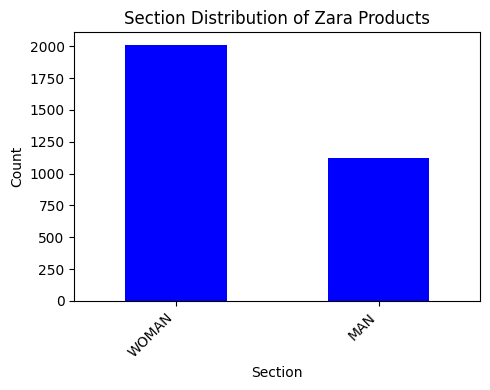

In [24]:
# Assuming 'section' column contains the section information
section_distribution = store_zara['section'].value_counts()

# Plotting the distribution
plt.figure(figsize=(5, 4))
section_distribution.plot(kind='bar', color='blue')
plt.title('Section Distribution of Zara Products')
plt.xlabel('Section')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* ## Insight:
### - This plot indicates that there are more Zara products available in the women's section compared to the men's section.
### - It helps Zara's Store understand which sections attract more attention and demand from customers, enabling targeted marketing efforts and product development strategies.

In [25]:
# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on product names
store_zara['name_sentiment'] = store_zara['name'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Perform sentiment analysis on product descriptions
store_zara['description_sentiment'] = store_zara['description'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

# Display the results
print("Sentiment analysis results:")
print(store_zara[['name', 'name_sentiment', 'description', 'description_sentiment']].head())


Sentiment analysis results:
                   name  name_sentiment  \
0   BASIC PUFFER JACKET          0.0000   
1         TUXEDO JACKET          0.0000   
2  SLIM FIT SUIT JACKET          0.3612   
3   STRETCH SUIT JACKET          0.0000   
4   DOUBLE FACED JACKET          0.0000   

                                         description  description_sentiment  
0  Puffer jacket made of tear-resistant ripstop f...                 0.0000  
1  Straight fit blazer. Pointed lapel collar and ...                 0.5267  
2  Slim fit jacket. Notched lapel collar. Long sl...                 0.3612  
3  Slim fit jacket made of viscose blend fabric. ...                 0.3612  
4  Jacket made of faux leather faux shearling wit...                 0.0000  


* ## Insight:
#### By analyzing the sentiment scores, businesses can gain insights into how customers perceive product names and descriptions. Positive sentiment scores may indicate that customers find the names and descriptions appealing, while negative scores may suggest areas for improvement or potential issues.

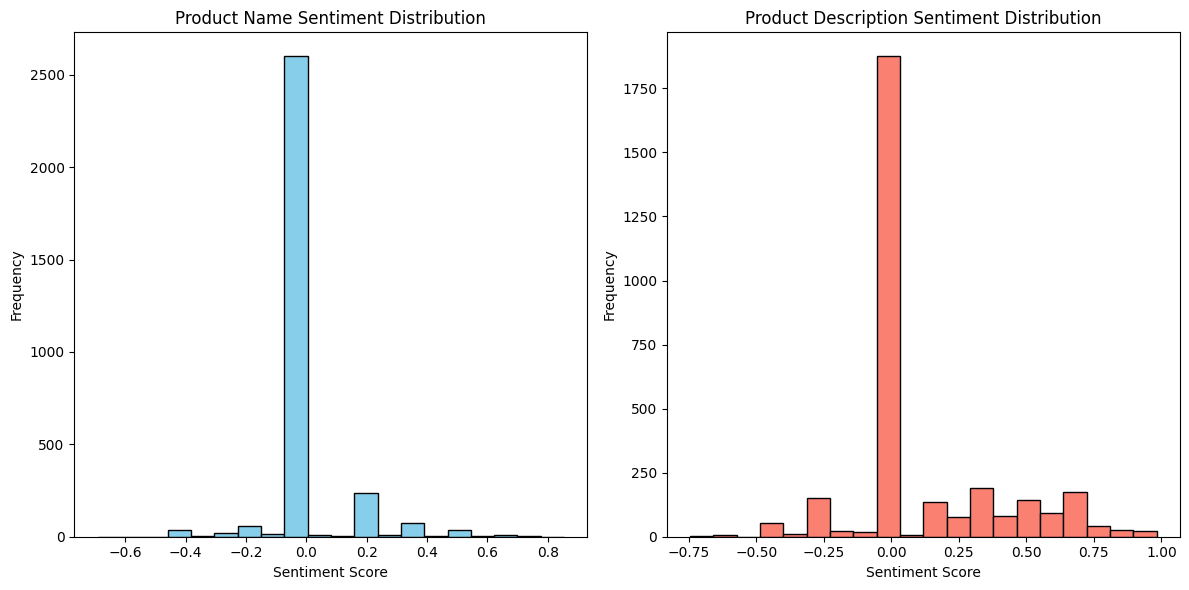

In [26]:
# Plotting sentiment analysis results
plt.figure(figsize=(12, 6))

# Histogram for product name sentiment scores
plt.subplot(1, 2, 1)
plt.hist(store_zara['name_sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Product Name Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Histogram for product description sentiment scores
plt.subplot(1, 2, 2)
plt.hist(store_zara['description_sentiment'], bins=20, color='salmon', edgecolor='black')
plt.title('Product Description Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

* ## Insight:
#### The plots show already same amount of 0 sentiments scores for both names and descriptions and this consistency between the sentiment scores indicates coherence in messaging. This ensures that the language used across different aspects of the product presentation aligns well, providing customers with a clear and unified understanding of the product.